In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
import joblib


In [2]:
# 1) Загрузка данных
file_path = r'D:\Эстер\с рс\Courses\ML Engineer\HWEster23\archive\penguins.csv'
df = pd.read_csv(file_path)

In [3]:
# 2) Первичный анализ данных
print("Доля пропусков:")
print(df.isnull().mean())  

print("\nОсновные статистики:")
print(df.describe())  


Доля пропусков:
culmen_length_mm     0.005814
culmen_depth_mm      0.005814
flipper_length_mm    0.005814
body_mass_g          0.005814
sex                  0.026163
dtype: float64

Основные статистики:
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         214.014620  4201.754386
std            5.459584         1.974793         260.558057   801.954536
min           32.100000        13.100000        -132.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.750000  4750.000000
max           59.600000        21.500000        5000.000000  6300.000000


In [4]:
# 2a) Заполнение пропущенных значений медианой
imputer = SimpleImputer(strategy='median')
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

In [5]:
# 2b) Нормализация данных
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])


In [7]:
# 3) Подбор гиперпараметров KMeans
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, algorithm='lloyd', random_state=42)
    kmeans.fit(df.iloc[:, :-1])
    inertia.append(kmeans.inertia_)

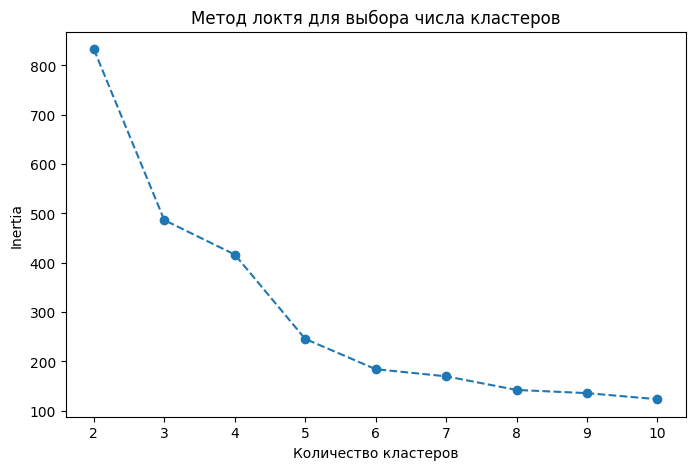

In [8]:
# 4) Метод локтя
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя для выбора числа кластеров')
plt.show()

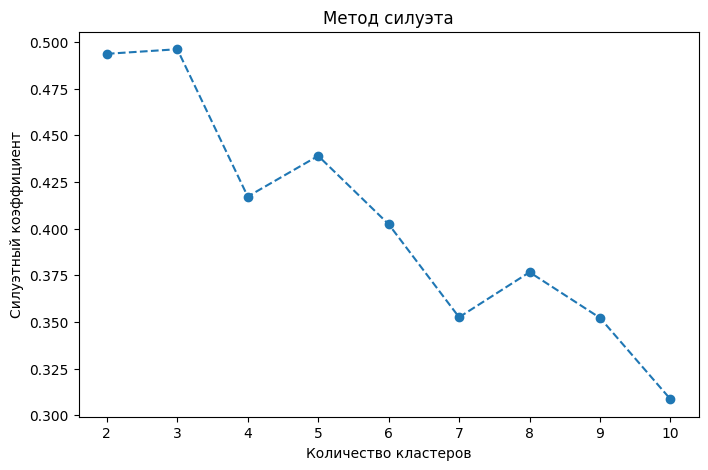

In [9]:
# 5) Метод силуэта
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, algorithm='lloyd', random_state=42)
    labels = kmeans.fit_predict(df.iloc[:, :-1])
    silhouette_scores.append(silhouette_score(df.iloc[:, :-1], labels))

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэтный коэффициент')
plt.title('Метод силуэта')
plt.show()


In [10]:
# Выбор оптимального количества кластеров
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, algorithm='lloyd', random_state=42)
df['Cluster'] = kmeans.fit_predict(df.iloc[:, :-1])


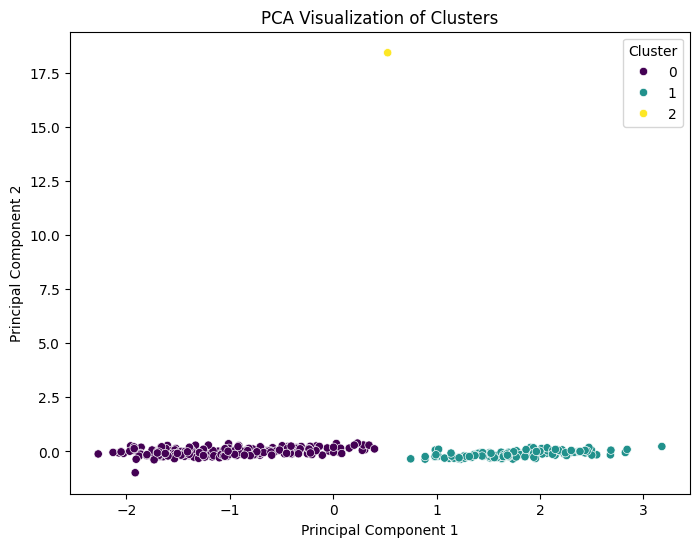

In [13]:
# 6) Визуализация кластеров (через снижение размерности PCA, t-SNE, UMAP)
from sklearn.decomposition import PCA
df_numeric = df.select_dtypes(include=[np.number])  

# Выполняем PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_numeric)

# Визуализация
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Clusters')
plt.show()

In [14]:
# 7) Сохранение модели
joblib.dump(kmeans, 'kmeans_penguins.joblib')


['kmeans_penguins.joblib']